In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *

import tensorflow as tf

In [3]:
STAMP=1 ; LAG=12 ; STEP=1
rec_model = tf.keras.models.load_model(f'./model_saved/best_model_stamp{STAMP}_lag{LAG}.h5')

2022-10-27 18:00:51.347706: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-27 18:00:52.412342: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9378 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:03:00.0, compute capability: 7.5
2022-10-27 18:00:52.413457: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 9335 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:05:00.0, compute capability: 7.5


In [4]:
STAMP=1 ; LAG=12 ; STEP=1
# rec_rmse = pd.read_csv('./output/metric/' + f'rmse_stamp{STAMP}_lag{LAG}_step{STEP}.csv')
rec_rmse = pd.read_csv('./output/metric/' + f'rmse_stamp{STAMP}_lag{LAG}_step{STEP}.csv')

FileNotFoundError: [Errno 2] No such file or directory: './output/metric/rmse_stamp1_lag12_step1.csv'

In [3]:
rec_rmse.columns = ['step','RMSE']
rec_rmse['step'] = rec_rmse['step']+1

In [4]:
rec_rmse

,step,RMSE
0,1,5.686598
1,2,7.037013
2,3,8.216789
3,4,9.147611
4,5,10.005877
5,6,10.778675
6,7,11.623492
7,8,12.369780
8,9,13.090631
9,10,13.731201


In [1]:
# plt.figure(figsize=(10,7))
# plt.scatter(rec_rmse['step'], rec_rmse['RMSE'])
# plt.plot(rec_rmse['step'], rec_rmse['RMSE'])
# plt.xlabel('step', fontsize=15)
# plt.ylabel('RMSE', fontsize=15)
# plt.title('RMSE of recursive multi-step forecasting', fontsize=20)

## MAPE

In [6]:
def rmse(y_true, y_pred):
    rtn = np.sqrt(  np.average( np.square(y_pred-y_true) ) )
    return  rtn

def mape(y_true,y_pred):
    rtn = np.mean(np.abs((y_true - y_pred) / (1.0+y_true)))
    return rtn

In [5]:
STAMP=1
for l in range(2,26,2):
    output_path=f'./output/predictions/stamp{STAMP}_lag{l}_step1'
    y_gt = pd.read_csv(output_path+'_gt.csv')
    y_pred = pd.read_csv(output_path+'_pred.csv')

    y_gt_arr = np.array(y_gt).reshape(-1)
    y_pred_arr = np.array(y_pred).reshape(-1)

#     print(f'MAPE for single-step forecasting : {round(mape(y_gt_arr, y_pred_arr),4)}')
    print(round(mape(y_gt_arr, y_pred_arr),3))

0.058
0.058
0.057
0.057
0.055
0.055
0.055
0.055
0.057
0.06
0.06
0.062


In [7]:
STAMP=1
for l in range(2,26,2):
    output_path=f'./output/predictions/stamp{STAMP}_lag{l}_step1'
    y_gt = pd.read_csv(output_path+'_gt.csv')
    y_pred = pd.read_csv(output_path+'_pred.csv')

    y_gt_arr = np.array(y_gt).reshape(-1)
    y_pred_arr = np.array(y_pred).reshape(-1)

#     print(f'MAPE for single-step forecasting : {round(mape(y_gt_arr, y_pred_arr),4)}')
    print(round(rmse(y_gt_arr, y_pred_arr),3))

6.383
6.379
6.443
5.971
5.705
5.608
5.782
5.952
6.245
5.556
5.608
5.757


# 예측 결과 시각화

## Single-step Forecast

In [17]:
test_start = datetime(2022,4,1,0,0)
test_end = datetime(2022,4,30,23,0)

test_time_list = []
for i in range(30*24*2):
    t = test_start + timedelta(minutes=i*30)
#     print(t)
    test_time_list.append(t)

In [27]:
len(test_time_list)

1440

In [31]:
len(test_time_list[LAG:-1])

1427

In [20]:
STAMP = 1; LAG = 12
output_path=f'./output/predictions/stamp{STAMP}_lag{LAG}_step1'
y_gt = pd.read_csv(output_path+'_gt.csv')
y_pred = pd.read_csv(output_path+'_pred.csv')

y_gt_arr = np.array(y_gt).reshape(-1)
y_pred_arr = np.array(y_pred).reshape(-1)

In [32]:
len(test_time_list[LAG:-1])
y_gt['datetime'] = test_time_list[LAG:-1]
y_pred['datetime'] = test_time_list[LAG:-1]

In [58]:
y_gt.describe().T.sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
col_0,1427.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
col_123,1427.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
col_124,1427.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
col_125,1427.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
col_126,1427.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...
col_50,1427.0,50.969867,39.007944,0.000000,14.0,50.000000,80.000000,180.0
col_74,1427.0,63.126489,41.446919,1.500000,27.0,56.000000,89.000000,219.5
col_115,1427.0,85.159075,50.093915,0.000000,46.0,83.000000,115.000000,250.0
col_97,1427.0,91.197617,136.258727,0.000000,6.0,30.000000,114.000000,880.0


Text(0.5, 1.0, 'True vs Prediction plot of location 72')

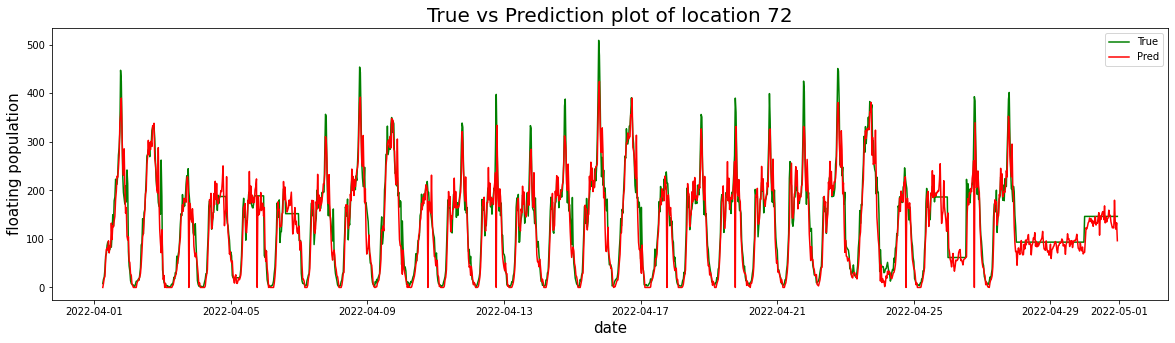

In [61]:
fig, ax = plt.subplots(figsize=(20,5))
sns.lineplot(x='datetime', y='col_72', data=y_gt, ax=ax, color='green', label='True')
sns.lineplot(x='datetime', y='col_72', data=y_pred, ax=ax, color='red', label='Pred')

# ax.set_xticks([0,1,2,3,4,5,6])
# ax.set_xticklabels(['Mon','Tue','Wed','Thur','Fri','Sat','Sun'], fontsize=15)

ax.set_xlabel('date', fontsize=15)
ax.set_ylabel('floating population', fontsize=15)
ax.set_title('True vs Prediction plot of location 72', fontsize=20)

In [41]:
y_gt_img = y_gt_arr.reshape(len(y_gt),10,20)
y_pred_img = y_pred_arr.reshape(len(y_pred),10,20)

y_gt_img_new = y_gt_img.copy()
y_pred_img_new = y_pred_img.copy()

for i in range(10):
    y_gt_img_new[:,i,:] = y_gt_img[:,9-i,:]
    y_pred_img_new[:,i,:] = y_pred_img[:,9-i,:]

In [53]:
y_gt.iloc[24,:]

col_0                       0.0
col_1                       0.0
col_2                       0.0
col_3                       0.0
col_4                       0.0
                   ...         
col_196                     0.0
col_197                     0.0
col_198                     0.0
col_199                     0.0
datetime    2022-04-01 18:00:00
Name: 24, Length: 201, dtype: object

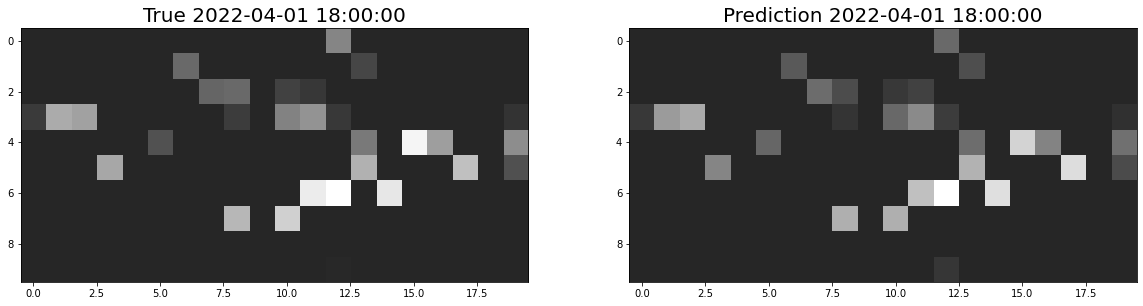

In [55]:
import datetime as dt
lag = 12
vmax = 200
c = 30
idx = 24
# target = dt.datetime(2022,4,1,0,0) + dt.timedelta(minutes=30*(lag+1+idx))
target = dt.datetime(2022,4,1,18,0)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,40))

# 2022-04-10 00:00
ax1.imshow(y_gt_img_new[idx][:][:] + c, cmap='gray', vmin=0, vmax=vmax)
ax1.set_title(f'True {target}', fontsize=20)

ax2.imshow(y_pred_img_new[idx][:][:] + c, cmap='gray', vmin=0, vmax=vmax)
ax2.set_title(f'Prediction {target}', fontsize=20)

# plt.tight_layout()
plt.show()

In [4]:
STAMP = 1 ; LAG = 10 ; STEP = 48 
gt30 = pd.read_csv(f'./output/predictions/stamp{STAMP}_lag{LAG}_step{STEP}_gt.csv')
pred30 = pd.read_csv(f'./output/predictions/stamp{STAMP}_lag{LAG}_step{STEP}_pred.csv')

FileNotFoundError: [Errno 2] No such file or directory: './output/predictions/stamp1_lag10_step48_gt.csv'

In [5]:
STAMP = 48 ; LAG = 10 ; STEP = 1 
gt24 = pd.read_csv(f'./output/predictions/stamp{STAMP}_lag{LAG}_step{STEP}_gt.csv')
pred24 = pd.read_csv(f'./output/predictions/stamp{STAMP}_lag{LAG}_step{STEP}_pred.csv')

In [10]:
gt_np24 = np.array(gt24).reshape([len(gt24),10,20])
pred_np24 = np.array(pred24).reshape([len(pred24),10,20])

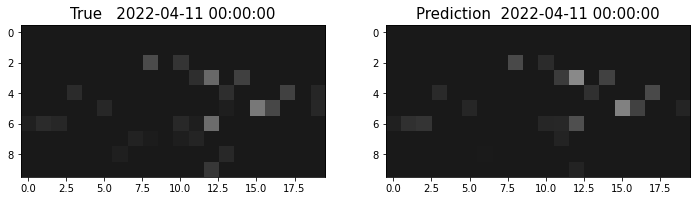

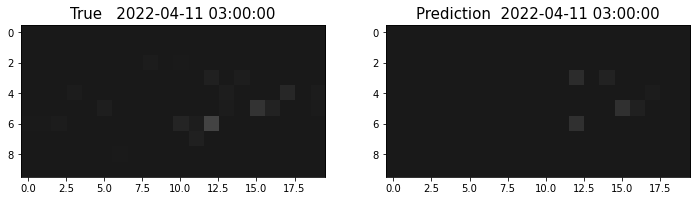

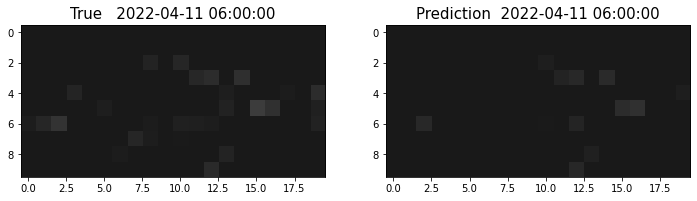

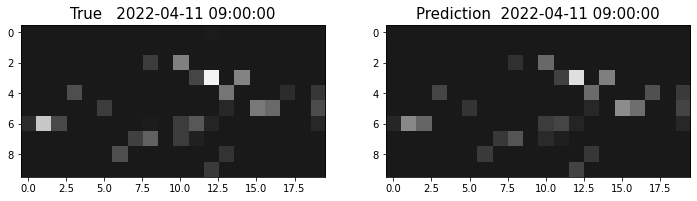

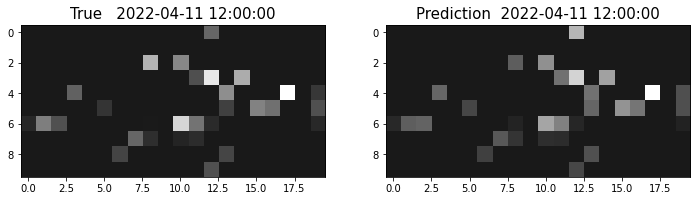

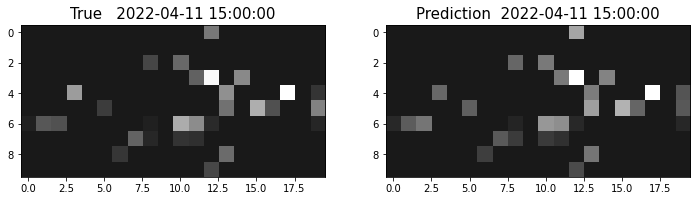

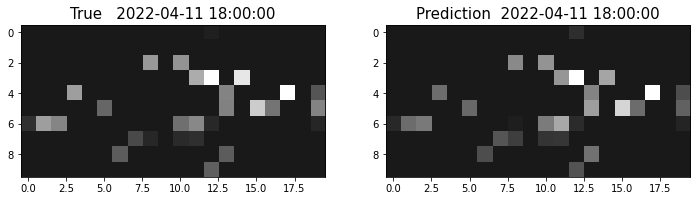

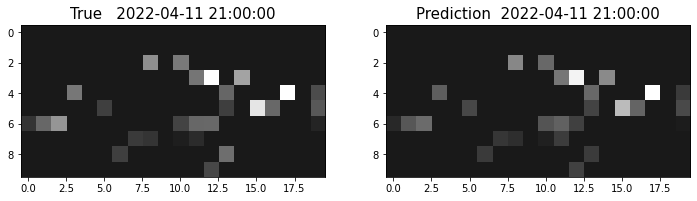

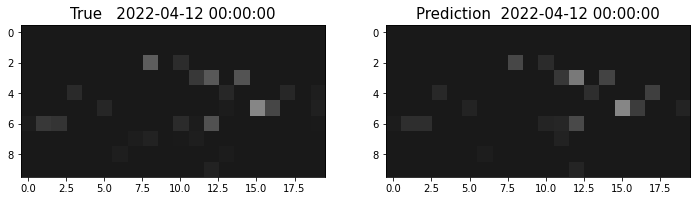

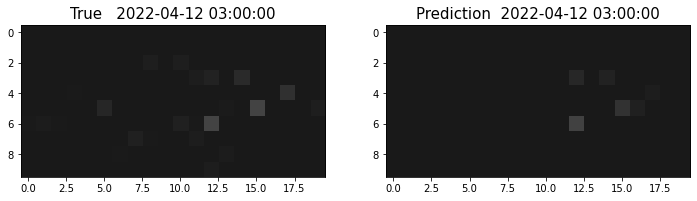

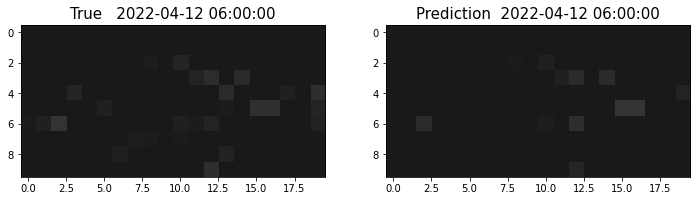

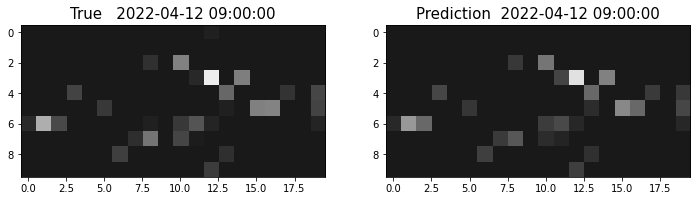

In [22]:
c = 20 ; vmax = 200 ; m = 10

for i in range(0,72,6):
    fig = plt.figure(figsize=(12,6))
    target = datetime(2022,4,1,0,0) + timedelta(minutes=30*(48*m+i))
    # True
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(gt_np24[i][:][:] + c, cmap='gray', vmin=0, vmax=vmax)
    ax1.set_title(f'True   {str(target)}', fontsize=15)
    
    # Prediction
    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(pred_np24[i][:][:] + c, cmap='gray', vmin=0, vmax=vmax)
    ax2.set_title(f'Prediction  {str(target)}', fontsize=15)
    
    plt.show()
    

In [34]:
m = 10

target = datetime(2022,4,1,0,0) + timedelta(minutes=30*(m+1))
str(target)

'2022-04-01 05:30:00'

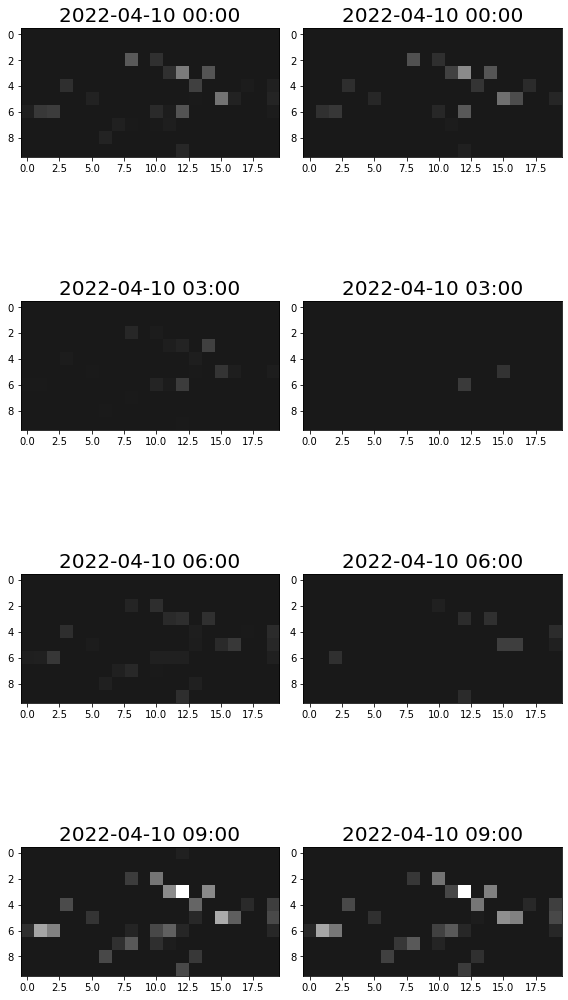

In [115]:
# vmax = train_image[0:48].max() # 252
vmax = 200
c = 20
idx = 480
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(8,16))

# 2022-04-10 00:00
ax1.imshow(gt_np[idx][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 00:00
ax1.set_title('2022-04-10 00:00', fontsize=20)

ax2.imshow(pred_np[idx][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 00:00
ax2.set_title('2022-04-10 00:00', fontsize=20)

# 2022-04-10 03:00
ax3.imshow(gt_np[idx+6][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 00:00
ax3.set_title('2022-04-10 03:00', fontsize=20)

ax4.imshow(pred_np[idx+6][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 00:00
ax4.set_title('2022-04-10 03:00', fontsize=20)

# 2022-04-10 06:00
ax5.imshow(gt_np[idx+12][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 00:00
ax5.set_title('2022-04-10 06:00', fontsize=20)

ax6.imshow(pred_np[idx+12][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 00:00
ax6.set_title('2022-04-10 06:00', fontsize=20)

# 2022-04-10 09:00
ax7.imshow(gt_np[idx+18][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 00:00
ax7.set_title('2022-04-10 09:00', fontsize=20)

ax8.imshow(pred_np[idx+18][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 00:00
ax8.set_title('2022-04-10 09:00', fontsize=20)

plt.tight_layout()
plt.show()

## Multi-step Forecast

In [3]:
table_rec = pd.read_csv('rmse_table_recursive.csv') 
table_rec
# table_rec2 = table_rec.T
# table_rec2.columns = [1,2,3,4,6,8,12,24]
# table_rec2 = table_rec2.iloc[3:,:]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,lag_2,lag_4,lag_6,lag_8,lag_10,lag_12,lag_14,lag_16,lag_18,lag_20,lag_22,lag_24
0,1,0.5,48,24.328610,24.300504,22.491657,24.334072,24.380894,24.354695,24.416405,24.296012,23.476947,22.245216,17.160519,17.506357
1,2,1.0,24,22.492056,21.961120,22.676412,22.420263,21.328354,19.352372,19.608265,20.530090,21.910460,23.592347,23.811571,25.113673
2,4,2.0,12,21.125764,21.516059,18.471775,17.884143,18.157104,21.982254,22.869001,22.234835,22.769790,22.297384,21.997676,22.145154
3,6,3.0,8,20.824779,21.138833,16.065516,20.410320,20.068970,20.124785,20.211001,20.393672,20.322049,20.944810,20.888905,20.307440
4,8,4.0,6,19.327721,17.902477,19.691026,20.059789,20.585779,20.289790,20.445949,20.769197,20.479972,20.514771,20.443437,20.595303
5,12,6.0,4,23.507548,19.620433,20.975551,21.525018,21.790642,22.381667,22.175225,23.250486,23.489964,22.628781,22.962307,22.569904
6,16,8.0,3,21.302758,21.718906,23.574145,23.474474,22.552222,23.496402,23.412381,23.593037,24.611012,24.757619,24.227576,24.444205
7,24,12.0,2,23.477005,24.441786,26.147628,25.163325,25.367216,25.752689,26.303112,26.790365,25.182173,24.623939,24.355528,24.337419


In [11]:
table_rec2.index = range(2,26,2)

In [7]:
round(table_rec2.min(axis=0), 3)

1     17.161
2     19.352
3     17.884
4     16.066
6     17.902
8     19.620
12    21.303
24    23.477
dtype: float64

In [12]:
round(table_rec2,3)

,1,2,3,4,6,8,12,24
2,24.329,22.492,21.126,20.825,19.328,23.508,21.303,23.477
4,24.301,21.961,21.516,21.139,17.902,19.620,21.719,24.442
6,22.492,22.676,18.472,16.066,19.691,20.976,23.574,26.148
8,24.334,22.420,17.884,20.410,20.060,21.525,23.474,25.163
10,24.381,21.328,18.157,20.069,20.586,21.791,22.552,25.367
12,24.355,19.352,21.982,20.125,20.290,22.382,23.496,25.753
14,24.416,19.608,22.869,20.211,20.446,22.175,23.412,26.303
16,24.296,20.530,22.235,20.394,20.769,23.250,23.593,26.790
18,23.477,21.910,22.770,20.322,20.480,23.490,24.611,25.182
20,22.245,23.592,22.297,20.945,20.515,22.629,24.758,24.624


In [6]:
# table = pd.read_csv('rmse_table_direct1.csv')
table.rename({'Unnamed: 0':'time_stamp', 'Unnamed: 1':'time_unit', 'Unnamed: 2':'step'},
            axis=1, inplace=True)

In [7]:
table

,time_stamp,time_unit,step,lag_2,lag_4,lag_6,lag_8,lag_10,lag_12,lag_14,lag_16,lag_18,lag_20,lag_22,lag_24
0,1,0.5,48,10.192342,9.976743,10.072920,10.318544,9.937923,9.827764,11.012592,10.190362,10.968408,10.653107,9.557562,9.973654
1,2,1.0,24,19.606145,16.552254,15.797243,13.756230,11.802586,10.337066,9.355990,9.288301,9.419541,9.885447,9.997652,9.203067
2,4,2.0,12,17.495299,14.516069,13.512144,11.538530,9.566888,9.413170,9.764364,9.655121,9.719749,9.647999,9.320041,9.604406
3,6,3.0,8,15.935717,13.538563,11.286518,9.976568,10.445527,9.871158,9.702216,9.559644,9.942607,10.358786,9.957551,9.760490
4,8,4.0,6,15.357394,12.391001,12.417648,10.637573,10.278757,10.570240,10.640702,10.511245,10.151826,10.026093,10.217030,10.887350
5,12,6.0,4,24.430368,12.093906,11.902118,10.990395,10.639808,10.925207,10.773181,11.407171,10.500507,10.614504,10.339677,10.668968
6,16,8.0,3,14.880017,11.182364,10.786979,11.344287,11.198007,10.870439,11.561311,10.866403,10.276864,10.221648,10.055191,9.983496
7,24,12.0,2,10.455245,10.845701,11.790697,11.251086,10.374775,10.055577,9.798581,9.636448,8.881473,8.371328,8.605119,8.636845
8,48,24.0,1,9.748609,10.112307,11.299431,9.597441,8.484221,9.065874,8.929446,9.682055,10.007467,10.659803,11.714872,12.514909


In [18]:
table2

,time_stamp_1,time_stamp_2,time_stamp_4,time_stamp_6,time_stamp_8,time_stamp_12,time_stamp_16,time_stamp_24,time_stamp_48
lag_2,10.192342,19.606145,17.495299,15.935717,15.357394,24.430368,14.880017,10.455245,9.748609
lag_4,9.976743,16.552254,14.516069,13.538563,12.391001,12.093906,11.182364,10.845701,10.112307
lag_6,10.072920,15.797243,13.512144,11.286518,12.417648,11.902118,10.786979,11.790697,11.299431
lag_8,10.318544,13.756230,11.538530,9.976568,10.637573,10.990395,11.344287,11.251086,9.597441
lag_10,9.937923,11.802586,9.566888,10.445527,10.278757,10.639808,11.198007,10.374775,8.484221
lag_12,9.827764,10.337066,9.413170,9.871158,10.570240,10.925207,10.870439,10.055577,9.065874
lag_14,11.012592,9.355990,9.764364,9.702216,10.640702,10.773181,11.561311,9.798581,8.929446
lag_16,10.190362,9.288301,9.655121,9.559644,10.511245,11.407171,10.866403,9.636448,9.682055
lag_18,10.968408,9.419541,9.719749,9.942607,10.151826,10.500507,10.276864,8.881473,10.007467
lag_20,10.653107,9.885447,9.647999,10.358786,10.026093,10.614504,10.221648,8.371328,10.659803


In [5]:
table_dir = pd.read_csv('rmse_table_direct1.csv') 

table_dir2 = table_dir.T
table_dir2 = table_dir2.iloc[3:,:]
table_dir2.columns = [0.5,1,2,3,4,6,8,12,24]
table_dir2.index = range(2,26,2)
print(round(table_dir2.min(axis=0), 3))

0.5      9.558
1.0      9.203
2.0      9.320
3.0      9.560
4.0     10.026
6.0     10.340
8.0      9.983
12.0     8.371
24.0     8.484
dtype: float64


In [7]:
round(table_dir2,3)

,0.5,1.0,2.0,3.0,4.0,6.0,8.0,12.0,24.0
2,10.192,19.606,17.495,15.936,15.357,24.430,14.880,10.455,9.749
4,9.977,16.552,14.516,13.539,12.391,12.094,11.182,10.846,10.112
6,10.073,15.797,13.512,11.287,12.418,11.902,10.787,11.791,11.299
8,10.319,13.756,11.539,9.977,10.638,10.990,11.344,11.251,9.597
10,9.938,11.803,9.567,10.446,10.279,10.640,11.198,10.375,8.484
12,9.828,10.337,9.413,9.871,10.570,10.925,10.870,10.056,9.066
14,11.013,9.356,9.764,9.702,10.641,10.773,11.561,9.799,8.929
16,10.190,9.288,9.655,9.560,10.511,11.407,10.866,9.636,9.682
18,10.968,9.420,9.720,9.943,10.152,10.501,10.277,8.881,10.007
20,10.653,9.885,9.648,10.359,10.026,10.615,10.222,8.371,10.660
